In [1]:
#Based on Aki Taanila's Tilastoapu

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#plt.style.use('seaborn-whitegrid')

In [2]:
# Open the data  # Powershellissä, pip install openpyxl
df = pd.read_excel('ShopSatisfactionSurveyData.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'ShopSatisfactionSurveyData.xlsx'

## List the first few lines

In [ ]:
df.head(n=10)

,H,1,2,3,4,5,6,7,8,9
0,1,1,34,4,1,4,2960.0,4.0,3,2
1,2,1,67,1,1,1,980.0,1.0,5,2
2,3,2,46,3,3,5,3500.0,4.0,2,4
3,4,1,22,2,2,3,860.0,1.0,5,3
4,5,2,30,5,2,4,3380.0,4.0,2,3


##  See if there are any missing values in the data (However, you don't have to do anything about them now)

In [ ]:
df.isnull().sum()

H    0
1    0
2    0
3    0
4    0
5    0
6    2
7    1
8    0
9    0
dtype: int64

## (Re)name the columns according to the explanations found in the Excel file

In [ ]:
df.columns = ['H', 'gender', 'age', 'family_size', 'house', 'education', 'net_income', 'purchases', 'sat_product_range', 'sat_price_level']

In [ ]:
df.head()

,H,gender,age,family_size,house,education,net_income,purchases,sat_product_range,sat_price_level
0,1,1,34,4,1,4,2960.0,4.0,3,2
1,2,1,67,1,1,1,980.0,1.0,5,2
2,3,2,46,3,3,5,3500.0,4.0,2,4
3,4,1,22,2,2,3,860.0,1.0,5,3
4,5,2,30,5,2,4,3380.0,4.0,2,3


## If necessary, delete any columns that you think are unnecessary

In [ ]:
df=df.drop(['H'], axis=1)

In [ ]:
df.head()

,gender,age,family_size,house,education,net_income,purchases,sat_product_range,sat_price_level
0,1,34,4,1,4,2960.0,4.0,3,2
1,1,67,1,1,1,980.0,1.0,5,2
2,2,46,3,3,5,3500.0,4.0,2,4
3,1,22,2,2,3,860.0,1.0,5,3
4,2,30,5,2,4,3380.0,4.0,2,3


## Print a summary of the variables

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             102 non-null    int64  
 1   age                102 non-null    int64  
 2   family_size        102 non-null    int64  
 3   house              102 non-null    int64  
 4   education          102 non-null    int64  
 5   net_income         100 non-null    float64
 6   purchases          101 non-null    float64
 7   sat_product_range  102 non-null    int64  
 8   sat_price_level    102 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 7.3 KB


In [ ]:
df.describe()

,gender,age,family_size,house,education,net_income,purchases,sat_product_range,sat_price_level
count,102.000000,102.000000,102.000000,102.000000,102.000000,100.000000,101.000000,102.000000,102.000000
mean,1.313725,41.176471,2.705882,1.745098,3.205882,2365.700000,2.584158,3.500000,2.754902
std,0.466298,12.779479,1.583255,0.684861,1.402531,960.653455,1.151237,1.149688,0.969192
min,1.000000,19.000000,1.000000,1.000000,1.000000,770.000000,1.000000,1.000000,1.000000
25%,1.000000,31.000000,1.000000,1.000000,2.000000,1667.500000,2.000000,3.000000,2.000000
50%,1.000000,39.500000,2.000000,2.000000,4.000000,2205.000000,2.000000,3.000000,3.000000
75%,2.000000,50.000000,4.000000,2.000000,4.000000,2990.000000,3.000000,5.000000,3.000000
max,2.000000,72.000000,7.000000,3.000000,5.000000,4850.000000,5.000000,5.000000,5.000000


c:\Users\tlahti\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 0, 'Net house income, n=100')

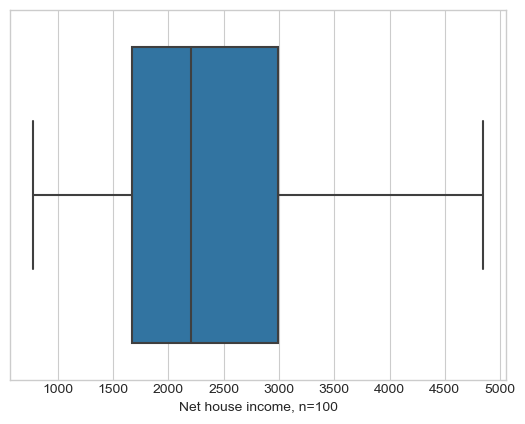

In [ ]:
ax3 = sns.boxplot(x = df['net_income'])

ax3.set_xlabel('Net house income, n=' + str(df['net_income'].count()))

In [ ]:
df.count()

gender               102
age                  102
family_size          102
house                102
education            102
net_income           100
purchases            101
sat_product_range    102
sat_price_level      102
dtype: int64

In [ ]:
for var in df:
    print(var, df[var].unique())

gender [1 2]
age [34 67 46 22 30 40 26 72 20 37 50 33 48 29 42 36 62 58 49 27 32 52 28 39
 45 21 57 31 38 55 19 68 35 54 24 44 51 56 65 25 60 69 43]
family_size [4 1 3 2 5 6 7]
house [1 3 2]
education [4 1 5 3 2]
net_income [2960.  980. 3500.  860. 3380. 2330. 3660. 2220.  820. 3800. 3030. 2920.
 2640. 2290. 4200. 3270. 1310. 1870. 3970. 2240. 3450. 2190. 1680. 2800.
 3220. 4620. 2450.  890. 3340. 1490. 2990. 2100. 1960. 4080. 2150.   nan
 1120. 1610. 1450. 1630. 3430. 2080. 3150. 1400. 1730. 1980. 1820. 2010.
 1910. 1280. 2680. 3240. 4670.  770. 3730. 2470. 1070. 2120. 2710.  930.
 2780. 2750. 1100. 4850. 1590. 1380. 1700. 4430.]
purchases [ 4.  1.  3.  2.  5. nan]
sat_product_range [3 5 2 4 1]
sat_price_level [2 4 3 1 5]


In [ ]:
df.nlargest(n = 3, columns = 'age')

,gender,age,family_size,house,education,net_income,purchases,sat_product_range,sat_price_level
7,1,72,2,1,2,2220.0,2.0,5,3
91,1,69,1,2,1,1100.0,1.0,5,2
37,1,68,1,1,2,1120.0,1.0,5,3


In [ ]:
df.nsmallest(n = 3, columns = 'age')

,gender,age,family_size,house,education,net_income,purchases,sat_product_range,sat_price_level
36,2,19,5,1,3,NaN,NaN,4,1
8,2,20,1,2,3,820.0,1.0,5,1
53,1,20,4,1,3,NaN,3.0,3,1


##  Investigate a few categorical/qualitative variables and generate frequency table(s) for their values



In [ ]:
df1=pd.crosstab(df['education'], 'Count')

In [ ]:
df1

col_0,Count
education,
1,16
2,22
3,10
4,33
5,21


In [ ]:
df1.index=['Primary school','Vocational school or similar','Secondary school graduate','Applied science university','Other university']
df1

col_0,Count
Primary school,16
Vocational school or similar,22
Secondary school graduate,10
Applied science university,33
Other university,21


In [ ]:
df1.columns.name=''

In [ ]:
df1

,Count
Primary school,16
Vocational school or similar,22
Secondary school graduate,10
Applied science university,33
Other university,21


## Draw a graphs based on the frequency tables

<Axes: >

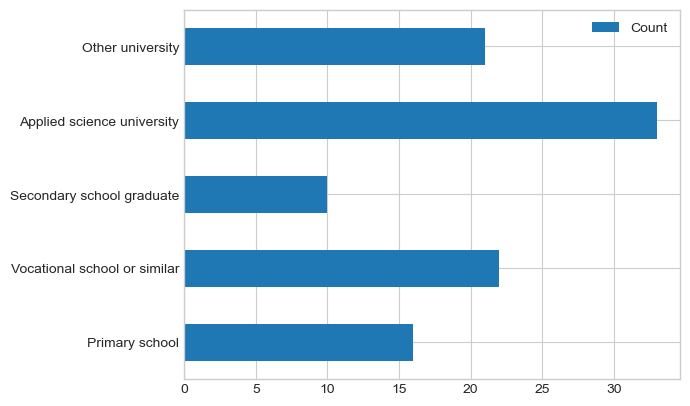

In [ ]:
df1.plot.barh()

Text(0.5, 0, 'Count')

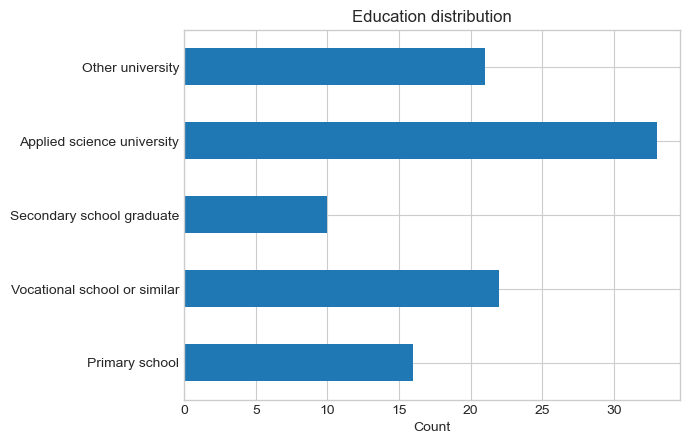

In [ ]:
df1.plot.barh(legend = False)

plt.title('Education distribution')
plt.xlabel('Count')

In [ ]:
sum(df1['Count'])

102

Text(0.5, 0, 'Count, N=102')

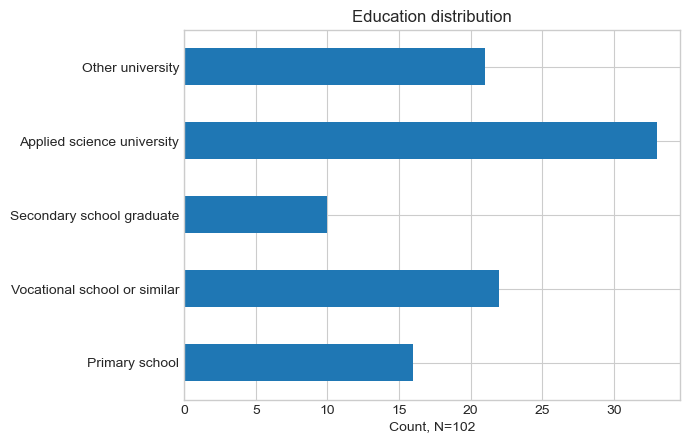

In [ ]:
df1.plot.barh(legend = False)

plt.title('Education distribution')
plt.xlabel('Count, N=102')

## Instead of using frequencies, use percentages

In [ ]:
df2 = pd.crosstab(df['education'], 'Count')
df2['%'] = df2['Count'] / df2['Count'].sum() * 100
df2.index = ['Primary school', 'Vocational school or similar', 'Secondary school graduate', 'Applied science university', 'Other university']
df2.columns.name = ''
df2


,Count,%
Primary school,16,15.686275
Vocational school or similar,22,21.568627
Secondary school graduate,10,9.803922
Applied science university,33,32.352941
Other university,21,20.588235


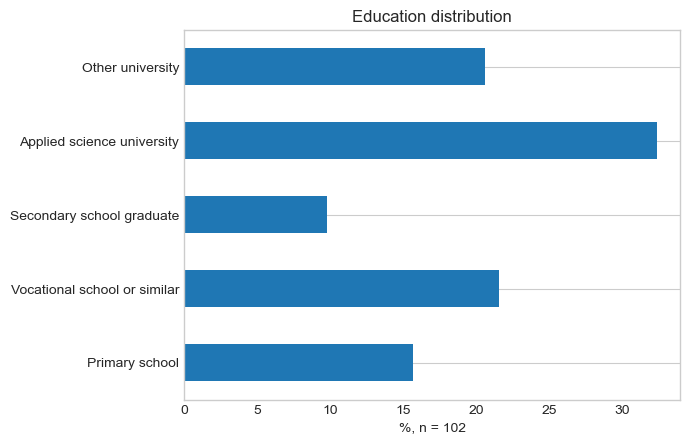

In [ ]:
df2['%'].plot.barh(zorder = 2)

plt.title('Education distribution')

plt.xlabel('%, n = ' + str(df2['Count'].sum()))

plt.grid(axis = 'x')
plt.tick_params(axis = 'y', length = 0)